<a href="https://colab.research.google.com/github/leonardosusa7/nlp_ean/blob/main/Cuadernos/Guia%202/Actividad_2_Clasificacion_Noticias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2: Clasificación de Noticias Usando RNNs y LSTMs

### Propósito de Aprendizaje
Adquirir habilidades prácticas en el preprocesamiento de datos textuales y en la implementación de modelos avanzados de RNN y LSTM para la clasificación de noticias en categorías especializadas como deportes, cultura, economía y justicia. Al finalizar, los estudiantes habrán desarrollado la capacidad de construir, entrenar y evaluar estos modelos, así como de comparar su rendimiento de manera crítica.

### Producto(s)
- **Cuaderno Jupyter (Jupyter Notebook):** Documentar el proceso completo de preprocesamiento, construcción, entrenamiento, evaluación y comparación de modelos RNN y LSTM.
- **Informe (PDF/Markdown):** Un documento que resuma los hallazgos, compare los modelos RNN y LSTM, y discuta las implicaciones prácticas de los resultados.


### Ejercicio 1: Carga y Exploración de Datos
**Objetivo:** Familiarizarse con el conjunto de datos y comprender la distribución de las categorías.

**Acciones:**
- Cargar el archivo `Noticias.xlsx` que contiene las noticias.
- Explorar la distribución de la columna `Etiqueta` para ver cuántas noticias pertenecen a cada categoría.
- Visualizar esta distribución mediante gráficos para identificar las categorías más frecuentes.

**Contexto:** La columna `Etiqueta` en el conjunto de datos contiene varias categorías, algunas de las cuales no son especializadas o no contienen un enfoque específico (por ejemplo, "archivo"). Para esta actividad, nos centraremos en noticias de las categorías especializadas: deportes, cultura, economía y justicia. Estas categorías son relevantes porque representan temas con un enfoque claro y específico, lo que hace que la clasificación sea más útil y aplicable en el análisis de noticias.


In [1]:
# prompt: Clonar reposito de github del proyecto

!git clone https://github.com/czambranobetancourt/nlp_ean.git

Cloning into 'nlp_ean'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 188 (delta 6), reused 26 (delta 3), pack-reused 145 (from 1)
Receiving objects: 100% (188/188), 224.78 MiB | 16.26 MiB/s, done.
Resolving deltas: 100% (61/61), done.
Updating files: 100% (31/31), done.


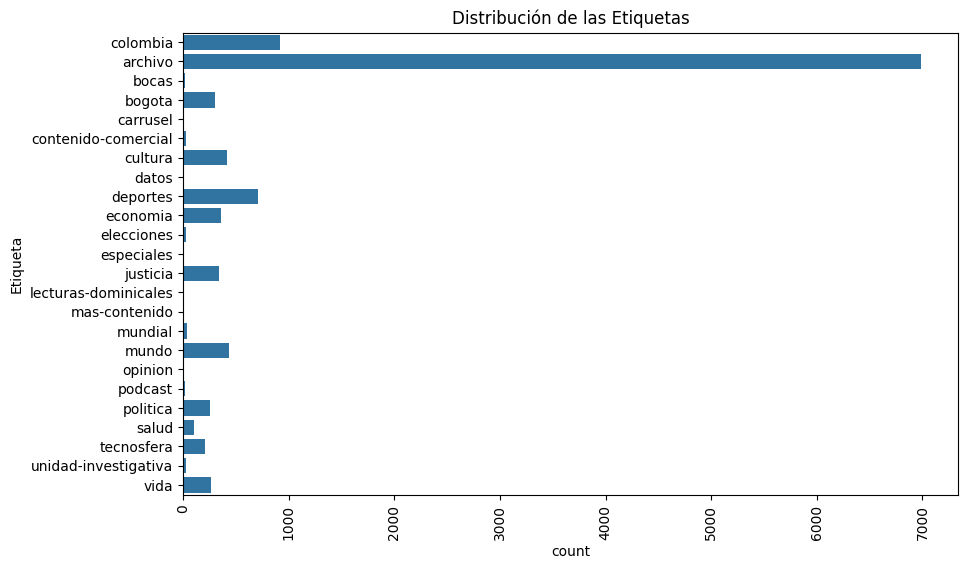

In [2]:
# Cargar bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
file_path = '/content/nlp_ean/Datos/Datos Crudos/Noticias.xlsx'
data = pd.read_excel(file_path)

## Quitamos los nulos
data = data.dropna()

# Mostrar las primeras filas del conjunto de datos
data.head()

# Visualizar la distribución de las etiquetas
plt.figure(figsize=(10, 6))
sns.countplot(data['Etiqueta'])
plt.title('Distribución de las Etiquetas')
plt.xticks(rotation=90)
plt.show()

### Ejercicio 2: Filtrado de Datos
**Objetivo:** Limitar el conjunto de datos a las categorías relevantes para garantizar que el modelo se entrene y evalúe en temas especializados.

**Acciones:**
- Excluir las noticias que pertenecen a la categoría "archivo" y cualquier otra que no esté en las categorías de deportes, cultura, economía y justicia.
- Asegurarse de que el conjunto de datos resultante tenga una distribución equilibrada para estas categorías, en la medida de lo posible.


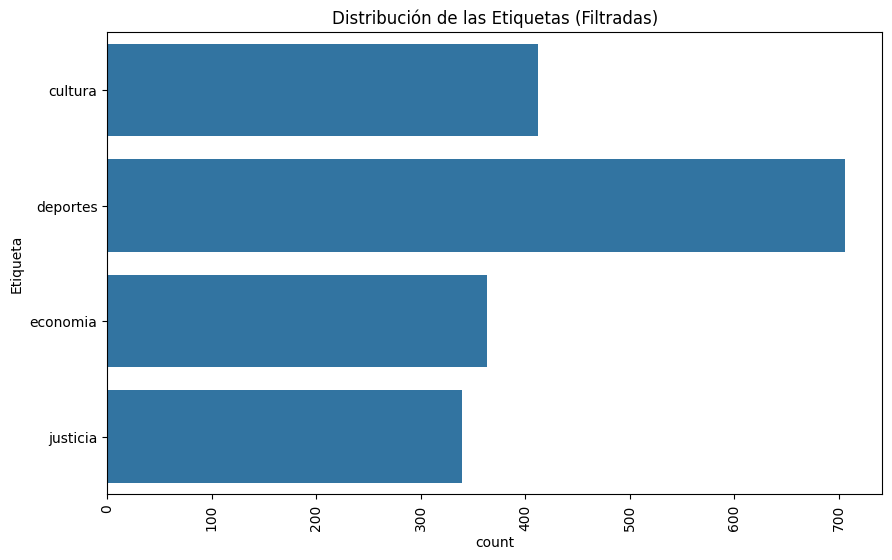

In [3]:
# Filtrar las categorías relevantes y excluir "archivo"
categorias_relevantes = ['deportes', 'cultura', 'economia', 'justicia']
data_filtrada = data[data['Etiqueta'].isin(categorias_relevantes)]

# Visualizar la distribución de las etiquetas después del filtrado
plt.figure(figsize=(10, 6))
sns.countplot(data_filtrada['Etiqueta'])
plt.title('Distribución de las Etiquetas (Filtradas)')
plt.xticks(rotation=90)
plt.show()



### Ejercicio 3: Preprocesamiento de Texto
**Objetivo:** Preparar los datos textuales para el entrenamiento del modelo.

**Acciones:**
- Convertir todo el texto a minúsculas para uniformidad.
- Eliminar puntuación y números para reducir el ruido en los datos.
- Eliminar palabras comunes (stop words) que no aportan significado específico al análisis.
- Tokenizar el texto, es decir, dividir el texto en palabras individuales.


Para este ejercicio debe instalarse la libreria keras y tensorflow, para ello se debe ejecutar el siguiente comando en la consola de anaconda:
```python
pip install keras tensorflow
```

In [4]:
!pip install keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [5]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import keras_nlp
import tensorflow as tf
import re
# Descargar recursos de NLTK
#nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Función de preprocesamiento
def preprocess_text(text):
    text = text.lower()
    #text = ''.join([c for c in text if c not in string.punctuation and not c.isdigit()])
    nuevo_texto = re.sub("[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}" , ' ', text) #Eliminación de correos electrónicos
    nuevo_texto = re.sub("[#|@](\w+)" , ' ', text) #Eliminación de etiquetas de tweets, instagram y facebook
    nuevo_texto = re.sub('https\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "http")
    nuevo_texto = re.sub('www\S+', ' ', nuevo_texto) # Eliminación de páginas web (palabras que empiezan por "www")
    nuevo_texto = re.sub("(?<!www\.)([\w-]+\.[\w-]+)"  , ' ', nuevo_texto) #Eliminación de paginas web que no comienzan con wwww
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~\\“\\”\\–\\‘\\’\\¿\\¡\\´\\ª\\—\\´\\£\\«\\»\\©\\®\\°\\·\\…\\•\\¼\\½\\ª]'
    nuevo_texto = re.sub(regex , ' ', nuevo_texto)
    nuevo_texto = re.sub("\d+", ' ', nuevo_texto) #Eliminación de numeros
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto) #Eliminación de espacios en blanco múltiples
    nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)# Eliminación de espacios en blanco múltiples
    tokens = word_tokenize(nuevo_texto)
    tokens = [word for word in tokens if word not in stopwords.words('spanish')]
    return ' '.join(tokens)

# Aplicar preprocesamiento
data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-5-183915aa52a5>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtrada['contenido_preprocesado'] = data_filtrada['contenido'].apply(preprocess_text)


In [15]:
data_filtrada.head()

,Columna1,Enlaces,Título,info,contenido,Etiqueta,contenido_preprocesado
10487,10487,https://www.eltiempo.com/cultura/al-interior-d...,"Al interior de, aparte, roquero, rock / El len...",'Al interior de' es el reemplazo sofisticado e...,Citas: “Los crímenes de violencia sexual comet...,cultura,citas crímenes violencia sexual cometidos inte...
10488,10488,https://www.eltiempo.com/cultura/arte-y-teatro...,Antonina Canal: 20 años de danza oriental en C...,La bailarina habló con EL TIEMPO de su trayect...,Con motivo de la celebración de los 20 años de...,cultura,motivo celebración años enseñanza danza orient...
10489,10489,https://www.eltiempo.com/cultura/arte-y-teatro...,"Aparece en Holanda cuadro de Picasso, robado h...","La pintura era propiedad de un jeque saudí, Ab...","El cuadro Busto de mujer, del artista español ...",cultura,cuadro busto mujer artista español pablo picas...
10490,10490,https://www.eltiempo.com/cultura/arte-y-teatro...,Así será la programación del Carnaval de las A...,El evento con algunos de los artistas más repr...,"El Carnaval de las Artes, organizado en Barran...",cultura,carnaval artes organizado barranquilla fundaci...
10491,10491,https://www.eltiempo.com/cultura/arte-y-teatro...,‘Fragmentos’ se viste de charlas y música,El lugar donde está el monumento de la artista...,"Louise du Toit, filósofa; el doctor Denis Mukw...",cultura,louise du toit filósofa doctor denis mukwege p...


In [6]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 75.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [16]:
import spacy

nlp = spacy.load("es_core_news_sm")

results = []

for index, row in data_filtrada.iterrows():
    texto = row['contenido_preprocesado']
    etiqueta = row['Etiqueta']
    id_oracion = row['Columna1']
    doc = nlp(texto)
    for token in doc:
        results.append([id_oracion, etiqueta, token.text, token.lemma_, token.pos_])

df_spacy = pd.DataFrame(results, columns=['id_oracion','etiqueta', 'token', 'lema', 'pos'])
df_spacy['Long_lema'] = df_spacy['lema'].str.len()
df_spacy = df_spacy[df_spacy['Long_lema'] > 2]
df_spacy = df_spacy[df_spacy['pos'].isin(['NOUN', 'VERB', 'ADJ', 'ADV'])]
print(df_spacy.head())
# df_spacy.to_csv('spacy_results.csv', index=False)

   id_oracion etiqueta      token       lema   pos  Long_lema
0       10487  cultura      citas       cita  NOUN          4
1       10487  cultura   crímenes     crímén   ADJ          6
2       10487  cultura  violencia  violencia  NOUN          9
3       10487  cultura     sexual     sexual   ADJ          6
4       10487  cultura  cometidos   cometido  NOUN          8


In [29]:
# Pivotado de datos
# ==============================================================================
noticias_pivot = df_spacy.groupby(["etiqueta","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="etiqueta", values= "count")
noticias_pivot.columns.name = None

# Test de correlación (coseno) por el uso y frecuencia de palabras
# ==============================================================================
from scipy.spatial.distance import cosine

def similitud_coseno(a,b):
    distancia = cosine(a,b)
    return 1-distancia

noticias_pivot.corr(method=similitud_coseno)

,cultura,deportes,economia,justicia
cultura,1.000000,0.933805,0.934203,0.926210
deportes,0.933805,1.000000,0.916098,0.914870
economia,0.934203,0.916098,1.000000,0.938873
justicia,0.926210,0.914870,0.938873,1.000000


In [33]:
# Número de palabras comunes
# ==============================================================================
palabras_cultura = set(df_spacy[df_spacy.etiqueta == 'cultura']['token'])
palabras_deportes = set(df_spacy[df_spacy.etiqueta == 'deportes']['token'])
palabras_economia = set(df_spacy[df_spacy.etiqueta == 'economia']['token'])
palabras_justicia = set(df_spacy[df_spacy.etiqueta == 'justicia']['token'])

print(f"Palabras comunes entre cultura y deportes: {len(palabras_cultura.intersection(palabras_deportes))}")
print(f"Palabras comunes entre cultura y economia: {len(palabras_cultura.intersection(palabras_economia))}")
print(f"Palabras comunes entre cultura y justicia: {len(palabras_cultura.intersection(palabras_justicia))}")
print(f"Palabras comunes entre deportes y economia: {len(palabras_deportes.intersection(palabras_economia))}")
print(f"Palabras comunes entre deportes y Justicia: {len(palabras_deportes.intersection(palabras_justicia))}")
print(f"Palabras comunes entre economia y Justicia: {len(palabras_economia.intersection(palabras_justicia))}")

Palabras comunes entre cultura y deportes: 8338
Palabras comunes entre cultura y economia: 8379
Palabras comunes entre cultura y justicia: 8020
Palabras comunes entre deportes y economia: 6795
Palabras comunes entre deportes y Justicia: 6570
Palabras comunes entre economia y Justicia: 7367


In [35]:
print(len(set(df_spacy.token)))

41825


In [36]:
8338/41825

0.19935445307830246

In [20]:
df_spacy = df_spacy.drop_duplicates(subset=['id_oracion', 'lema', 'etiqueta'])
data_procesada = df_spacy.groupby(['id_oracion', 'etiqueta'])['lema'].apply(lambda x: ' '.join(x)).reset_index()
data_procesada.head()

,id_oracion,etiqueta,lema
0,10487,cultura,cita crímén violencia sexual cometido interior...
1,10488,cultura,motivo celebración año enseñanza danza orienta...
2,10489,cultura,cuadro busto mujer artista español robado hace...
3,10490,cultura,carnaval art organizado cuevo preparar décimo ...
4,10491,cultura,louise toit filósofo doctor soprano betty garc...


In [21]:
# Tokenizar el texto

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenización y padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_procesada['lema'])
sequences = tokenizer.texts_to_sequences(data_filtrada['contenido_preprocesado'])
word_index = tokenizer.word_index
max_len = 100
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Mostrar algunas secuencias preprocesadas
padded_sequences[:5]

## También puede usar las técnicas de preprocesamiento de texto y de embedding que hicimos anteriormente




array([[   63, 17327,   753,  3792,   572,   845,   464,  6599,  1505,
         1148, 10002,  3792,   845,  1561,  2959,  1248,   119, 15083,
          636,    49, 15085,    20,  2020, 10902,  6156,  5912, 15086,
           63,  6600, 15087,   902, 15088,  1228,   547,  1561,    57,
         1561,  3284,  4012,  4012,  1561,  1109, 15089,  5913,  1902,
         1089,  2229,  5913,  8789,  1903, 15090,   144,   101,  9435,
          573,  5913,    44,  9435, 27653,   512,   406,   754,    38,
           21,    22,  1449,    23, 14456,    26,    11,     4,    12,
        16325,    29,  1888, 28980,  2052,    13,    32, 16325,    33,
            5,    14,    15, 26148,    34,   611,  2052, 13385,    17,
           18,  4091,    19,  6445,    35,     6,  4869,    36,    19,
           37],
       [ 2291,  4921,   212,  1042,  1317, 15139,  2230,  4921,  2963,
         5447,  1720, 15105, 15095, 15105, 15095, 25705, 10002, 15106,
        15105,   994,  1131, 15095,   520,  1456,  1021,  159

### Ejercicio 4: División del Conjunto de Datos
**Objetivo:** Crear conjuntos de datos de entrenamiento y validación para evaluar el modelo.

**Acciones:**
- Dividir el conjunto de datos preprocesado en dos partes: uno para entrenar el modelo y otro para validarlo.
- Asegurarse de que la división sea aleatoria pero mantenga una proporción similar de las categorías en ambos conjuntos.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificación de etiquetas
label_encoder = LabelEncoder()
data_procesada['Etiqueta_codificada'] = label_encoder.fit_transform(data_procesada['etiqueta'])

# División del conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, data_procesada['Etiqueta_codificada'], test_size=0.2, random_state=42)

# Mostrar tamaño de los conjuntos de datos
len(X_train), len(X_val)


(1456, 364)

## Ejercicio 5: Construcción y Entrenamiento de Modelos RNN

**Objetivo:** Implementar un modelo de Red Neuronal Recurrente (RNN) para clasificar noticias en las categorías especializadas.

**Acciones:**
- Construir un modelo RNN utilizando capas de Embedding, SimpleRNN y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4405 - loss: 1.2305 - val_accuracy: 0.6484 - val_loss: 0.8041
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6994 - loss: 0.7049 - val_accuracy: 0.7033 - val_loss: 0.6175
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8217 - loss: 0.4232 - val_accuracy: 0.7198 - val_loss: 0.6756
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9212 - loss: 0.2945 - val_accuracy: 0.7335 - val_loss: 0.6963
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7773 - loss: 0.6212 - val_accuracy: 0.6648 - val_loss: 0.8594
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7852 - loss: 0.5804 - val_accuracy: 0.5440 - val_loss: 1.3990
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5273 - loss: 1.1998 - val_accuracy: 0.5604 - val_loss: 0.9574
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5421 - loss: 0.9724 - val_accuracy: 0.5220 - val_loss: 1.

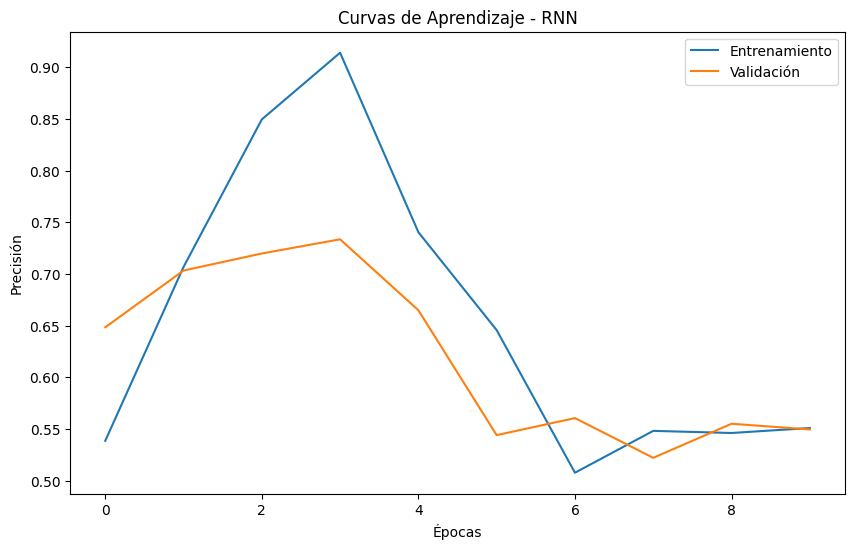

In [24]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

# Construcción del modelo RNN
# Haga cambios en la arquitectura del modelo para mejorar su rendimiento
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))
model_rnn.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_rnn = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo RNN
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN')
plt.show()


## Ejercicio 6: Construcción y Entrenamiento de Modelos LSTM

**Objetivo:** Implementar un modelo de Red Neuronal LSTM (Long Short-Term Memory) para clasificar noticias en las categorías especializadas.

**Acciones:**

- Construir un modelo LSTM utilizando capas de Embedding, LSTM y Dense.
- Compilar el modelo con una función de pérdida adecuada y un optimizador.
- Entrenar el modelo con el conjunto de datos de entrenamiento y validar su rendimiento con el conjunto de datos de validación.
- Evaluar el rendimiento del modelo en términos de precisión y pérdida.

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3730 - loss: 1.3390 - val_accuracy: 0.5440 - val_loss: 0.9588
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5447 - loss: 0.9073 - val_accuracy: 0.5412 - val_loss: 0.9922
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.5642 - loss: 0.8825 - val_accuracy: 0.5275 - val_loss: 0.9536
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5579 - loss: 0.8908 - val_accuracy: 0.5275 - val_loss: 0.9479
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5983 - loss: 0.8673 - val_accuracy: 0.5412 - val_loss: 0.9451
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5495 - loss: 0.8779 - val_accuracy: 0.5385 - val_loss: 0.9531
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5623 - loss: 0.8822 - val_accuracy: 0.5220 - val_loss: 0.9492
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5743 - loss: 0.8661 - val_accuracy: 0.5137 - v

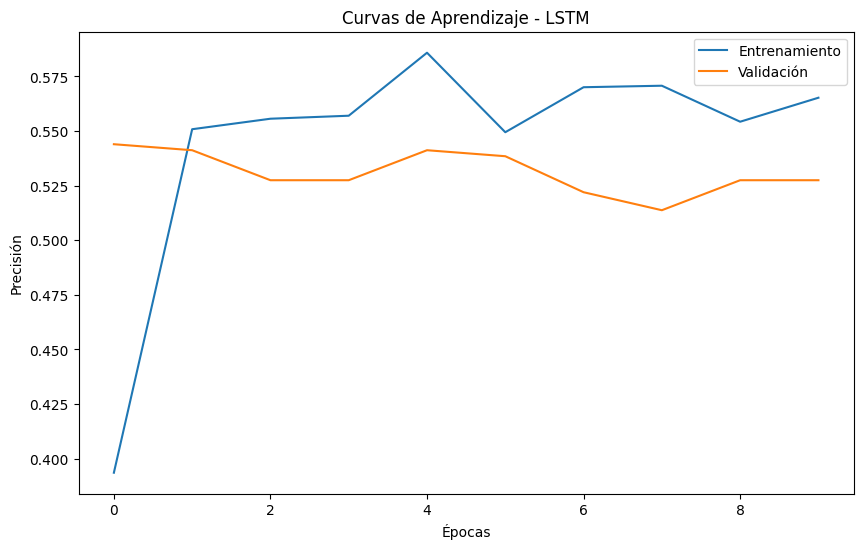

In [25]:
from keras.layers import LSTM

# Construcción del modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(word_index) + 1, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(units=64, return_sequences=False))
model_lstm.add(Dense(units=len(categorias_relevantes), activation='softmax'))

# Compilación del modelo
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history_lstm = model_lstm.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Visualización de resultados del modelo LSTM
plt.figure(figsize=(10, 6))
plt.plot(history_lstm.history['accuracy'], label='Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - LSTM')
plt.show()


## Ejercicio 7: Comparación de Modelos y Análisis de Resultados

**Objetivo:** Comparar los modelos RNN y LSTM en términos de rendimiento y analizar los resultados obtenidos.

**Acciones:**
- Comparar la precisión y la pérdida de los modelos RNN y LSTM en el conjunto de datos de validación.
- Calcula otras métricas de evaluación como la sensibilidad, la especificidad y el puntaje F1.
- Discutir las fortalezas y debilidades de cada modelo en función de los resultados obtenidos.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
RNN Classification Report:
              precision    recall  f1-score   support

    deportes       0.00      0.00      0.00        79
     cultura       0.78      0.92      0.84       135
    economia       0.37      0.97      0.54        78
    justicia       0.00      0.00      0.00        72

    accuracy                           0.55       364
   macro avg       0.29      0.47      0.35       364
weighted avg       0.37      0.55      0.43       364

LSTM Classification Report:
              precision    recall  f1-score   support

    deportes       0.31      0.92      0.47        79
     cultura       0.95      0.87      0.91       135
    economia       0.22      0.03      0.05        78
    justicia       0.00      0.00      0.00        72

    accuracy                           0.53       364
   macro avg       0.37      0.45      0.36       364
weighted avg       0.47      0.53      0.45       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

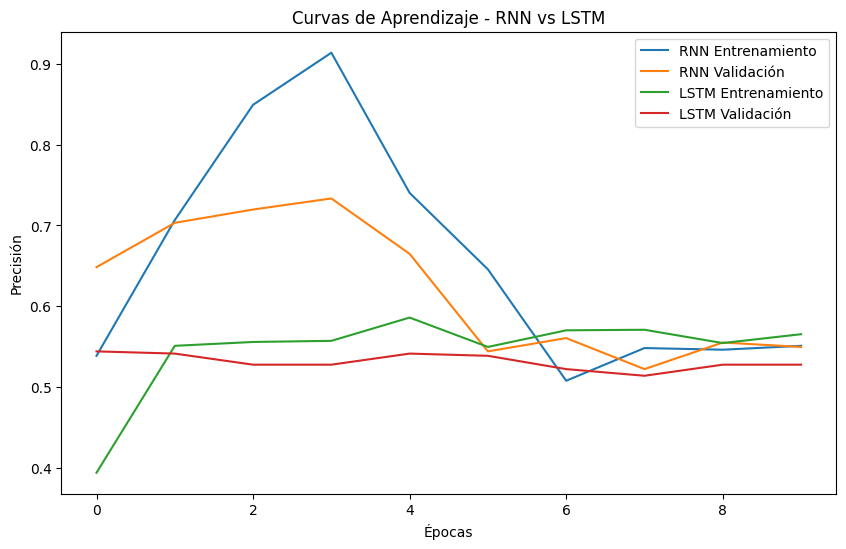

In [26]:
from sklearn.metrics import classification_report

# Evaluar modelos en el conjunto de validación
y_pred_rnn = model_rnn.predict(X_val).argmax(axis=1)
y_pred_lstm = model_lstm.predict(X_val).argmax(axis=1)

# Calcular métricas de rendimiento
report_rnn = classification_report(y_val, y_pred_rnn, target_names=categorias_relevantes)
report_lstm = classification_report(y_val, y_pred_lstm, target_names=categorias_relevantes)

print("RNN Classification Report:")
print(report_rnn)

print("LSTM Classification Report:")
print(report_lstm)

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.plot(history_rnn.history['accuracy'], label='RNN Entrenamiento')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validación')
plt.plot(history_lstm.history['accuracy'], label='LSTM Entrenamiento')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curvas de Aprendizaje - RNN vs LSTM')
plt.show()


## Ejercicio 8: Conclusiones y Recomendaciones

**Objetivo:** Resumir los hallazgos y proporcionar recomendaciones basadas en los resultados obtenidos.

**Acciones:**
- Resumir las principales conclusiones de la comparación entre los modelos RNN y LSTM.
- Proporcionar recomendaciones para mejorar el rendimiento de los modelos o explorar enfoques alternativos.
- Discutir las implicaciones prácticas de los resultados y cómo podrían aplicarse en un contexto real.
